__模型评估__

# 数据处理

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

## 读取数据，对数据进行归一化

In [27]:
df = pd.read_csv("/Users/zhouwencheng/Desktop/Grass/05 AI/05 jupyter/10 data/creditcard.csv")

# 先对数据进行归一下处理
from sklearn.preprocessing import StandardScaler  
df.Amount = StandardScaler().fit_transform(df.Amount.values.reshape(-1, 1))

## 对数据进行过采样处理

In [28]:
# 过采样

features = df.loc[:, df.columns != 'Class']
labels    = df.loc[:, df.columns == 'Class']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.3, random_state = 0)

oversampler = SMOTE(random_state = 0)
X_train_os, y_train_os = oversampler.fit_sample(X_train, y_train.values.ravel()) 
X_train_os = pd.DataFrame(X_train_os)
y_train_os = pd.DataFrame(y_train_os)

## 建模 训练以及预测

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits = 3, random_state = 1)
lr = LogisticRegression(C = 1, penalty = 'l1', solver='liblinear')  # 加入正则惩罚项
score = cross_val_score(lr, X_train_os, y_train_os.values.ravel(), cv = kf)

print('score:', score)
print('score mean:', score.mean())


score: [0.97910763 0.9821901  0.95374551]
score mean: 0.9716810771168828


In [30]:
lr.fit(X_train,y_train.values.ravel())
y_pred = lr.predict(X_test.values)

# 混淆矩阵(confusion_matrix)
- TP(True Positive)：将正类预测为正类数，真实为0，预测也为0
- FN(False Negative)：将正类预测为负类数，真实为0，预测为1
- FP(False Positive)：将负类预测为正类数， 真实为1，预测为0
- TN(True Negative)：将负类预测为负类数，真实为1，预测也为1

In [6]:
from sklearn.metrics import confusion_matrix

## 计算

In [7]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)

TP = cnf_matrix[0, 0]
FN = cnf_matrix[0, 1]
FP = cnf_matrix[1, 0]
TN = cnf_matrix[1, 1]

cnf_matrix

array([[85284,    12],
       [   56,    91]])

## 画图

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline


In [9]:
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

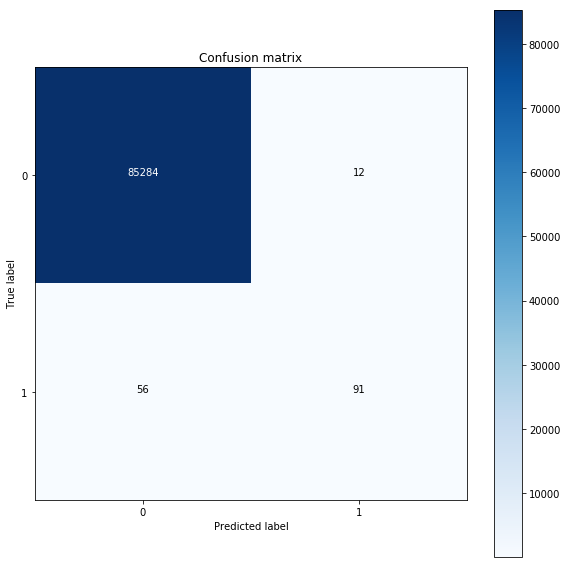

In [10]:
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, [0, 1])

# 模型评估方法


## Accuracy-准确率
- 简单粗暴的方法，直接用 预测正确的个数/总数 x 100% 即(TP+FP)/(TP+FN+FP+TN),但这个评估方法只适用于平衡数据集，即正负样本个数大致相同，若用于非平衡数据集效果会很差。

In [11]:
accuracy = (TP + FP)/(TP + FP + FN +TN)
accuracy

0.9987945179827488

## Precision-精确率
- 精确率可以告诉我们正样本预测中正确的预测的百分比，即TP/(TP+FP)

In [12]:
precision = TP/(TP+FP)
precision

0.9993438012655261

## Recall-召回率
- 召回率可以告诉我们预测正确的正样本个数占总正样本个数的百分比，即TP/(TP+FN),通常，精确率和召回率成反比。

In [13]:
recall = TP/(TP + FN)
recall

0.9998593134496342

In [31]:
from sklearn.metrics import roc_curve, auc  ###计算roc和auc

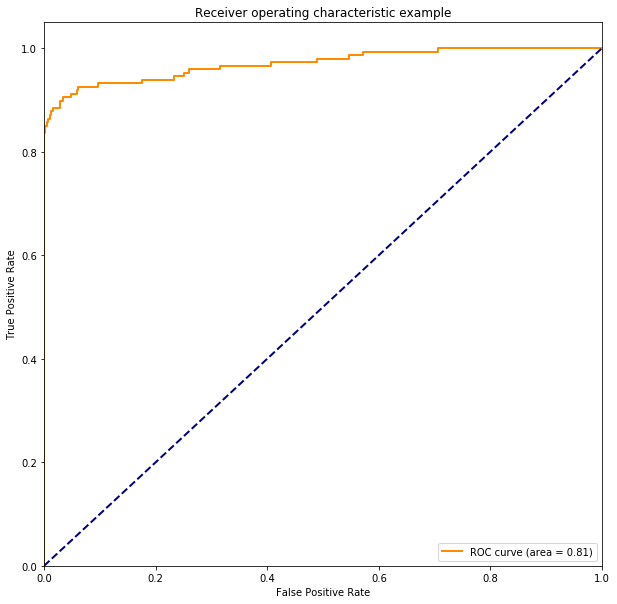

In [36]:
y_score = lr.decision_function(X_test.values)
fpr,tpr,threshold = roc_curve(y_test, y_score) ###计算真正率和假正率
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#  decision_function

## ROC曲线

[ 0.17284263  0.65445393 -0.54087101  0.3555818   0.00579262 -0.20174248
  0.0565328   0.00571205 -0.1517872   0.25656427  0.39764688  0.04549989
  0.33455816 -0.12499602  0.23724787 -0.36250412 -0.0874348  -0.11575856
 -0.25270656 -0.23457408 -0.18239472 -0.10728706 -0.32201471  0.71954289
 -0.29292995 -0.22073314 -0.32473373 -0.19383585 -0.24296148  0.37524795]
auc: 0.8133333333333334


<Figure size 432x288 with 0 Axes>

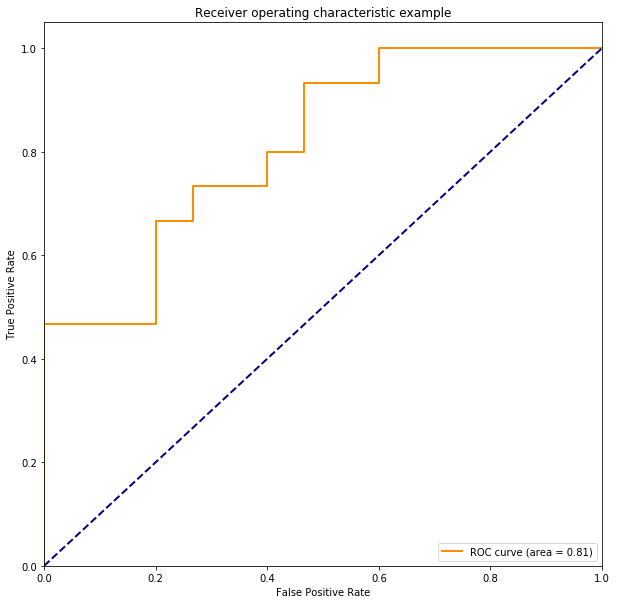

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
from sklearn.model_selection import train_test_split
 
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target 
##变为2分类
X, y = X[y != 2], y[y != 2]
 
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
 
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=0)
 
# Learn to predict each class against the other
svm = svm.SVC(kernel='linear', probability=True,random_state=random_state)
 
###通过decision_function()计算得到的y_score的值，用在roc_curve()函数中
y_score = svm.fit(X_train, y_train).decision_function(X_test) 
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y_test, y_score) ###计算真正率和假正率
roc_auc = auc(fpr,tpr) ###计算auc的值
print('auc:', roc_auc)

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()




In [26]:
X

array([[ 5.1       ,  3.5       ,  1.4       , ..., -1.07709907,
        -0.4246633 , -0.8299646 ],
       [ 4.9       ,  3.        ,  1.4       , ...,  1.4121517 ,
        -1.38043075, -0.53591456],
       [ 4.7       ,  3.2       ,  1.3       , ...,  0.65880214,
        -0.59691711, -0.22295918],
       ...,
       [ 6.2       ,  2.9       ,  4.3       , ..., -0.8281054 ,
        -1.43286053, -0.60855489],
       [ 5.1       ,  2.5       ,  3.        , ...,  0.06532704,
        -0.55380986, -0.88254487],
       [ 5.7       ,  2.8       ,  4.1       , ..., -1.04873453,
         0.37475842, -0.98731143]])